In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train_0irEZ2H.csv')

In [3]:
df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [4]:
df[['day', 'month', 'year']] = df['week'].str.split('/', expand = True)

In [5]:
df = df.drop('week', axis = 1)

In [6]:
df.head()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,1,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,8091,217390,141.0750,141.0750,0,0,52,17,01,11


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x, y = df.drop('units_sold', axis = 1), df['units_sold']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
model = RandomForestRegressor(n_jobs = -1)
model.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [9]:
model.score(x_test, y_test)

0.7768690719026461

In [10]:
from sklearn.metrics import root_mean_squared_error

y_pred = model.predict(x_test)
rmse = root_mean_squared_error(y_pred, y_test)
rmse

27.05772949856872

In [11]:
# comparing rmse to the std deviation:
df.units_sold.describe()

count    150150.000000
mean         51.674206
std          60.207904
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: units_sold, dtype: float64

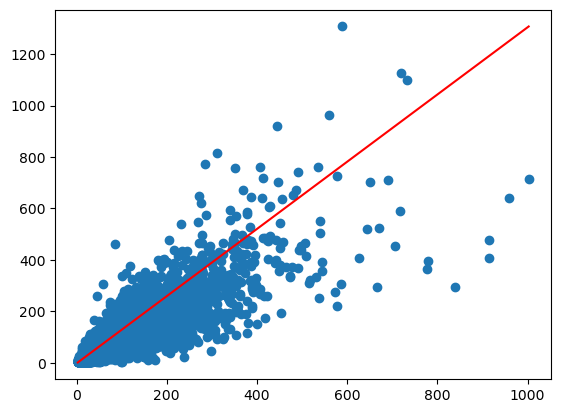

In [12]:
plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(), y_test.max()), color = 'red')

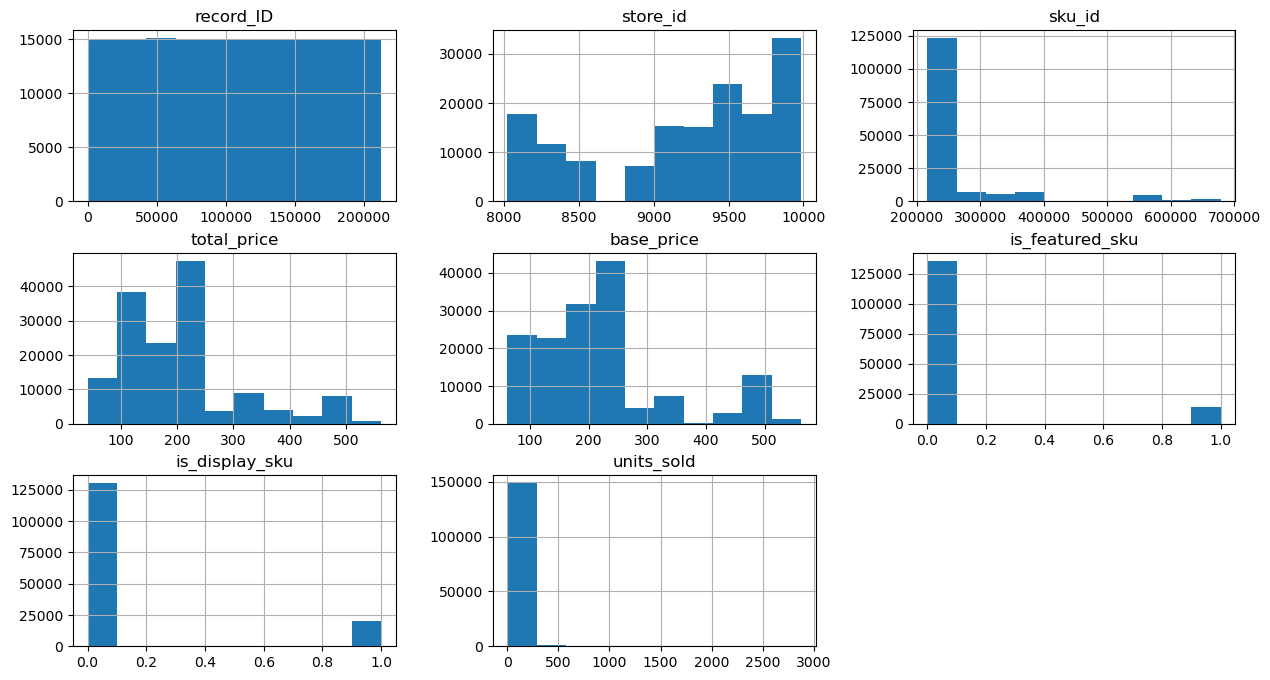

In [13]:
df.hist(figsize=(15,8))
plt.show()

In [14]:
df = df.drop('record_ID', axis = 1)

In [15]:
len(df.store_id.unique())

76

In [16]:
len(df.sku_id.unique())

28

In [17]:
df.units_sold.describe()

count    150150.000000
mean         51.674206
std          60.207904
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: units_sold, dtype: float64

In [18]:
df.units_sold.quantile(0.99)

283.0

In [19]:
df = df[df.units_sold < df.units_sold.quantile(0.99)]

<Axes: >

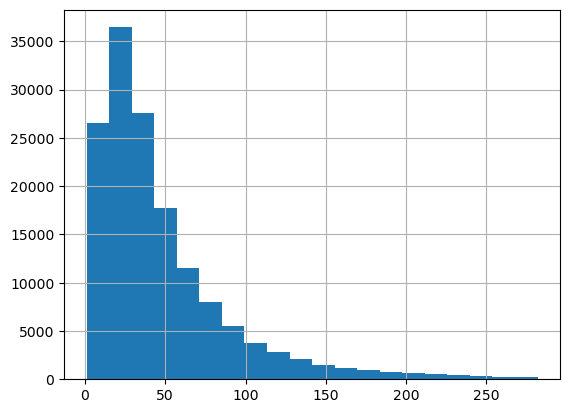

In [20]:
df.units_sold.hist(bins = 20)

In [21]:
df = df.join(pd.get_dummies(df.store_id, prefix='store')).drop('store_id', axis = 1)
df = df.join(pd.get_dummies(df.sku_id, prefix='item')).drop('sku_id', axis = 1)

In [22]:
df

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year,store_8023,store_8058,...,item_320485,item_327492,item_378934,item_398721,item_545621,item_546789,item_547934,item_600934,item_673209,item_679023
0,99.0375,111.8625,0,0,20,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
1,99.0375,99.0375,0,0,28,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
2,133.9500,133.9500,0,0,19,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
3,133.9500,133.9500,0,0,44,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
4,141.0750,141.0750,0,0,52,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,235.8375,235.8375,0,0,38,09,07,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150146,235.8375,235.8375,0,0,30,09,07,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150147,357.6750,483.7875,1,1,31,09,07,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150148,141.7875,191.6625,0,1,12,09,07,13,False,False,...,False,False,False,False,False,False,True,False,False,False


In [23]:
model = RandomForestRegressor(n_jobs = -1)

x, y = df.drop('units_sold', axis = 1), df['units_sold']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
model.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [25]:
model.score(x_test, y_test)

0.8259812751585501

In [26]:
y_pred = model.predict(x_test)
rmse = root_mean_squared_error(y_pred, y_test)

In [27]:
rmse

17.806829175116988

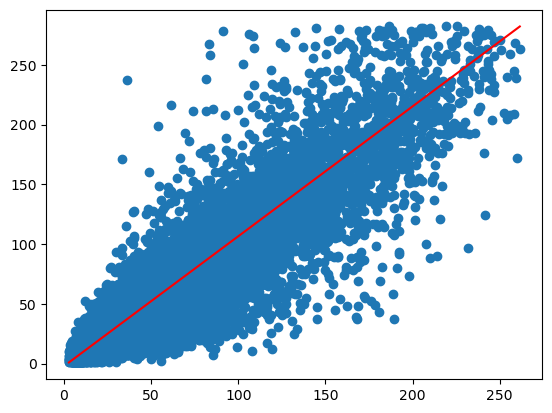

In [28]:
plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(), y_test.max()), color = 'red')

In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [10, 20],
    'min_samples_split' : [2, 3]
}
model = RandomForestRegressor(n_jobs = -1)
grid_search = GridSearchCV(model, param_grid, verbose = 2, cv = 3)
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   1.5s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   1.6s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   1.6s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=   2.7s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=   2.6s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=   2.7s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=   1.6s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=   1.6s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=   1.5s
[CV] END ...............min_samples_split=3, n_estimators=20; total time=   2.6s
[CV] END ...............min_samples_split=3, n_estimators=20; total time=   2.4s
[CV] END ...............min_samples_split=3, n_es

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'min_samples_split': [2, 3], 'n_estimators': [10, 20]},
             verbose=2)

In [70]:
best_model = grid_search.best_estimator_

In [72]:
grid_search.best_params_

{'min_samples_split': 3, 'n_estimators': 20}

In [74]:
best_model.score(x_test, y_test)

0.8210244244861679